<a href="https://colab.research.google.com/github/aiwithroy/Topic-Modeling-using-NLTK-Gensim/blob/master/Topic_Modeling_using_NLTK_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Topic Modeling on News Articles using NLTK Gensim**

# Loading Necessary Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
import numpy as np
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now

In [2]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 122.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 

In [3]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


# Loading Data

In [4]:
from sklearn.datasets import fetch_20newsgroups
# Dictionary with 'data' as key and each review as an element of list
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [5]:
# list of articles
documents = dataset.data

In [6]:
# Dataframe with a column `document` containing all the articles
news_df = pd.DataFrame({'document':documents})

In [7]:
print(news_df.head())

                                            document
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...


# Data Cleaning

In [8]:
news_df = news_df[:100]
tokenized_doc = news_df['document'].str.replace("[^a-zA-Z#]", " ")
news_df.shape

(100, 1)

In [9]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text;

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     well sure about story seem biased what disagre...
1     yeah expect people read actually accept hard a...
2     although realize that principle your strongest...
3     notwithstanding legitimate fuss about this pro...
4     well will have change scoring playoff pool unf...
                            ...                        
95    follow mark last posting current investigation...
96    could folk song clementine memory serves part ...
97    first chip doesn that runs megabits second whi...
98    created image gaea therefore must pinnacle cre...
99    sale pontiac grand prix white white rims gray ...
Name: document, Length: 100, dtype: object

# Handling the Stop-words

In [10]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [11]:
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

0     well sure story seem biased disagree statement...
1     yeah expect people read actually accept hard a...
2     although realize principle strongest points wo...
3     notwithstanding legitimate fuss proposal much ...
4     well change scoring playoff pool unfortunately...
                            ...                        
95    follow mark last posting current investigation...
96    could folk song clementine memory serves part ...
97    first chip runs megabits second beyond need vo...
98    created image gaea therefore must pinnacle cre...
99    sale pontiac grand prix white white rims gray ...
Name: document, Length: 100, dtype: object

# Lemmatization

In [12]:
# Initializing wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

tokenized_doc = tokenized_doc.apply(lemData)
tokenized_doc

0     well sure story seem biased disagree statement...
1     yeah expect people read actually accept hard a...
2     although realize principle strongest point wou...
3     notwithstanding legitimate fuss proposal much ...
4     well change scoring playoff pool unfortunately...
                            ...                        
95    follow mark last posting current investigation...
96    could folk song clementine memory serf part go...
97    first chip run megabit second beyond need voic...
98    created image gaea therefore must pinnacle cre...
99    sale pontiac grand prix white white rim gray i...
Name: document, Length: 100, dtype: object


# TF-IDF Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialising the tfidf vectorizer with the default stopword list
tfidf = TfidfVectorizer(stop_words="english", max_features= 1000, max_df = 0.5, smooth_idf=True)

#Vectorizing 'X' column
vector =tfidf.fit_transform(tokenized_doc)

#Converting vector into an array
X= vector.toarray()
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.196228,0.0,0.0,0.0,0.167434,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.126337,0.00000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.17339,0.0,0.0,0.0
96,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.122917,0.00000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0



# Topic modelling using TruncatedSVD

In [14]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("The number of topics chosen are",len(svd_model.components_))

The number of topics chosen are 5


In [15]:
svd_model.components_.shape

(5, 1000)

In [16]:
terms = tfidf.get_feature_names_out()
topics = []

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topics.append("Topic "+str(i)+": ")
    for t in sorted_terms:
        topics.append(t[0])

final_topic_list = [topics[i:i+8] for i in range(0, len(topics), 8)]

for x in final_topic_list:
    print (x)

['Topic 0: ', 'like', 'know', 'chip', 'think', 'time', 'good', 'year']
['Topic 1: ', 'memory', 'cache', 'vram', 'simm', 'chip', 'simms', 'song']
['Topic 2: ', 'chip', 'phone', 'government', 'clipper', 'voice', 'key', 'work']
['Topic 3: ', 'israel', 'israeli', 'arab', 'memory', 'table', 'medium', 'know']
['Topic 4: ', 'vram', 'need', 'jesus', 'really', 'government', 'appears', 'simms']


# Gensim LSI & LDA

In [17]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [18]:
stop = stopwords_set
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents from the complaints column
list_of_docs = tokenized_doc.tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:2])

[['well', 'sure', 'story', 'seem', 'biased', 'disagree', 'statement', 'medium', 'ruin', 'israel', 'reputation', 'rediculous', 'medium', 'israeli', 'medium', 'world', 'lived', 'europe', 'realize', 'incidence', 'described', 'letter', 'occured', 'medium', 'whole', 'seem', 'ignore', 'subsidizing', 'israel', 'existance', 'european', 'least', 'degree', 'think', 'might', 'reason', 'report', 'clearly', 'atrocity', 'shame', 'austria', 'daily', 'report', 'inhuman', 'act', 'commited', 'israeli', 'soldier', 'blessing', 'received', 'government', 'make', 'holocaust', 'guilt', 'away', 'look', 'jew', 'treating', 'race', 'power', 'unfortunate'], ['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'run', 'steam', 'sorry', 'pity', 'sorry', 'feeling', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables',

In [19]:
# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.435*"graphic" + 0.249*"mail" + 0.228*"image" + 0.224*"file" + '
  '0.191*"send" + 0.174*"object" + 0.158*"format" + 0.157*"server" + '
  '0.137*"also" + 0.124*"tracer"'),
 (1,
  '-0.463*"israel" + -0.322*"israeli" + -0.205*"soldier" + -0.204*"lebanese" + '
  '-0.183*"peace" + -0.181*"village" + -0.136*"zone" + -0.133*"would" + '
  '-0.122*"people" + -0.118*"time"'),
 (2,
  '0.231*"know" + 0.218*"would" + 0.216*"like" + 0.210*"good" + '
  '-0.198*"israel" + 0.194*"patch" + 0.170*"contact" + 0.170*"bike" + '
  '0.145*"life" + 0.143*"jesus"'),
 (3,
  '0.348*"adirondack" + 0.280*"john" + 0.278*"providence" + 0.278*"cape" + '
  '0.278*"rochester" + 0.278*"fredericton" + 0.278*"breton" + '
  '0.278*"baltimore" + 0.278*"moncton" + 0.278*"utica"'),
 (4,
  '-0.293*"patch" + -0.267*"contact" + -0.248*"bike" + -0.216*"force" + '
  '0.193*"life" + 0.188*"good" + 0.168*"jesus" + -0.163*"motorcycle" + '
  '-0.160*"wheel" + -0.160*"effect"')]


In [20]:
import string
from gensim.models.ldamodel import LdaModel

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5,id2word=dictionary, random_state=20, passes=30)

# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.018*"graphic" + 0.010*"mail" + 0.009*"image" + 0.009*"file" + '
  '0.008*"send" + 0.007*"object" + 0.006*"format" + 0.006*"server" + '
  '0.006*"also" + 0.005*"tracer"'),
 (1,
  '0.011*"israel" + 0.007*"israeli" + 0.006*"would" + 0.004*"even" + '
  '0.004*"mormon" + 0.004*"soldier" + 0.004*"time" + 0.004*"year" + '
  '0.004*"lebanese" + 0.004*"peace"'),
 (2,
  '0.006*"think" + 0.005*"well" + 0.005*"like" + 0.004*"much" + 0.004*"year" + '
  '0.003*"thing" + 0.003*"cache" + 0.003*"would" + 0.003*"bike" + '
  '0.003*"want"'),
 (3,
  '0.006*"time" + 0.005*"good" + 0.005*"jesus" + 0.004*"life" + 0.004*"power" '
  '+ 0.004*"know" + 0.004*"creation" + 0.004*"better" + 0.004*"torrey" + '
  '0.003*"would"'),
 (4,
  '0.008*"like" + 0.006*"know" + 0.006*"chip" + 0.005*"would" + '
  '0.004*"government" + 0.004*"system" + 0.004*"another" + 0.004*"good" + '
  '0.004*"could" + 0.004*"need"')]


# Evaluation Metric

In [21]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.889941321156568

Coherence Score:  0.4146679867713507


# pyLDAvis Visualization

In [22]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.213478 -0.002697       1        1  44.885271
4      0.061487 -0.134099       2        1  20.194117
1      0.059983  0.083884       3        1  15.351958
3      0.054142  0.038978       4        1  10.974765
2      0.037865  0.013934       5        1   8.593889, topic_info=         Term       Freq      Total Category  logprob  loglift
1060  graphic  91.000000  91.000000  Default  30.0000  30.0000
21     israel  19.000000  19.000000  Default  29.0000  29.0000
1123    image  49.000000  49.000000  Default  28.0000  28.0000
281      file  49.000000  49.000000  Default  27.0000  27.0000
22    israeli  12.000000  12.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
190      good   2.299325  25.632673   Topic5  -6.0524   0.0429
373       say   1.756490   6.249010   Topic5  -6.3217   1.1850
2103   really   1.754994  14.303293   Topic5  -6.3226   0.3561
2546     game   1.754342   5.528069   Topic5  -6.3230   1.3064
75      maybe   1.753583   7.557479   Topic5  -6.3234   0.9932

[320 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2536      2  0.992005  adirondack
3486      4  0.797524   admitting
3631      3  0.878131      agenda
3632      3  0.878131       agent
3469      5  0.560989        alot
...     ...       ...         ...
186       2  0.332515        year
186       3  0.332515        year
186       4  0.142506        year
186       5  0.190008        year
2882      3  0.836673        zone

[558 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

# Word Cloud Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


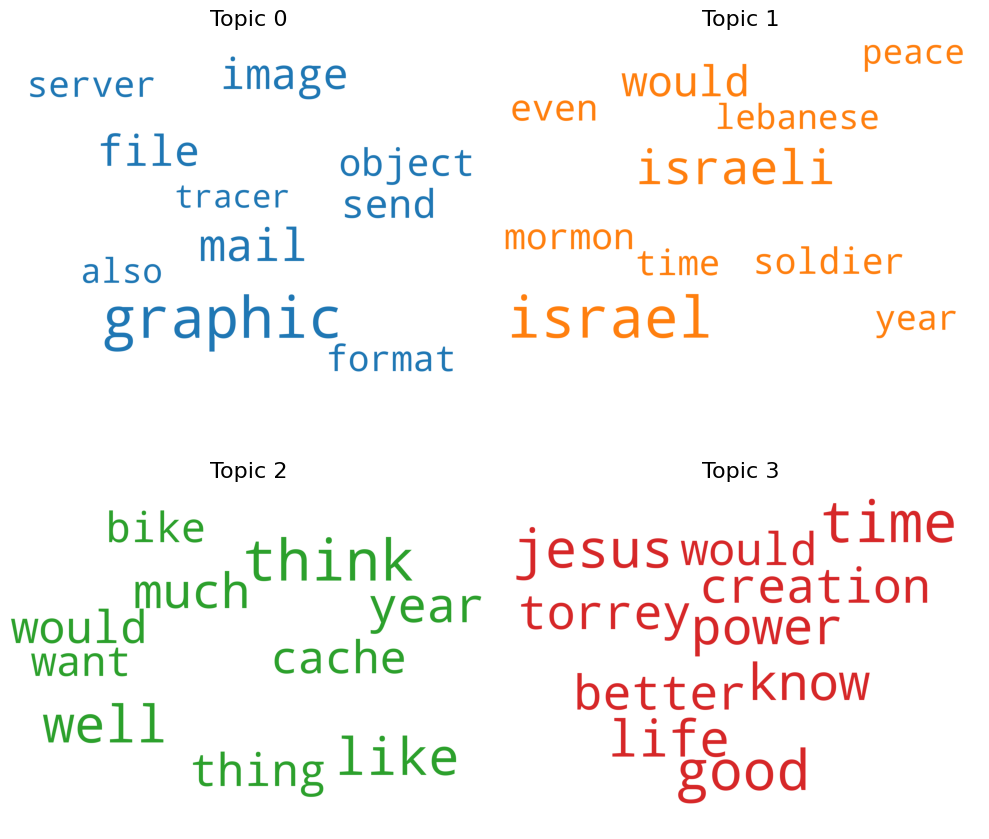

In [23]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()